In [125]:
import matplotlib.pyplot as plt 
import pandas as pd
from prettytable import PrettyTable
from sklearn import svm
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures

accuracies = {}

def predict(model, x_train, y_train, x_test, y_test, method, show_coeffs=False):
    model.fit(x_train, y_train)
    if show_coeffs:
        print("Coeffs: \n", model.coef_)
        _ = [print(k, v) for k, v in zip(x_train.columns, model.coef_)]
        print("Intercept: \n", model.intercept_)

    score = model.score(x_test, y_test)
    print(f"Score: {score}")

    y_pred = model.predict(x_test)
    plt.scatter(y_pred, y_test)
    plt.plot(y_test, y_test, c='r')
    plt.title(method)
    plt.grid()
    plt.xlabel('y (real)')
    plt.ylabel('y (predicted)')

    global accuracies
    accuracies[method] = score

# 3.3 регрессия

In [126]:
california = fetch_california_housing()
type(california)

sklearn.utils._bunch.Bunch

In [127]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [128]:
print(type(california.data), california.data.shape)
print(type(california.target), california.target.shape)

<class 'numpy.ndarray'> (20640, 8)
<class 'numpy.ndarray'> (20640,)


In [129]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [130]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [131]:
y = data['Price']
x = data.drop('Price', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=160)

Coeffs: 
 [ 4.40204508e-01  9.56823673e-03 -1.14222566e-01  6.82418276e-01
 -3.32392057e-06 -3.61425838e-03 -4.20361154e-01 -4.33341342e-01]
MedInc 0.44020450799314953
HouseAge 0.009568236733306012
AveRooms -0.11422256559923852
AveBedrms 0.6824182755414572
Population -3.323920566899657e-06
AveOccup -0.0036142583762447168
Latitude -0.42036115397719553
Longitude -0.43334134181312267
Intercept: 
 -36.85790997715772
Score: 0.5958833949634967


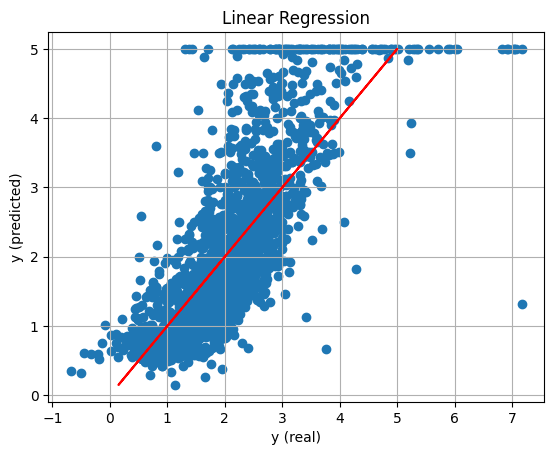

In [132]:
predict(LinearRegression(), x_train, y_train, x_test, y_test, 'Linear Regression', show_coeffs=True)

Score: 0.7161634608924309


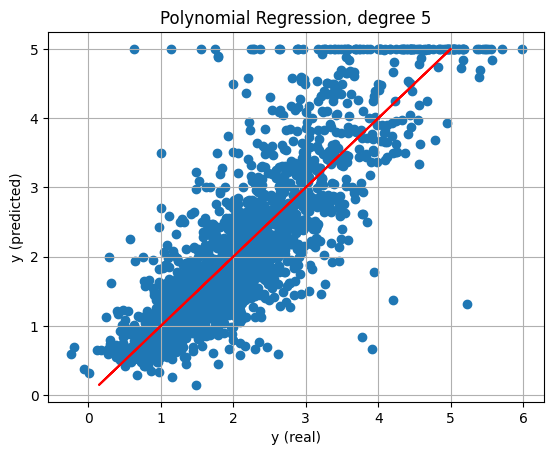

In [133]:
degree = 5
poly_x_train = PolynomialFeatures(degree).fit_transform(x_train)
poly_x_test = PolynomialFeatures(degree).fit_transform(x_test)

predict(LinearRegression(), poly_x_train, y_train, poly_x_test, y_test, f'Polynomial Regression, degree {degree}')

Score: 0.4783123691302429


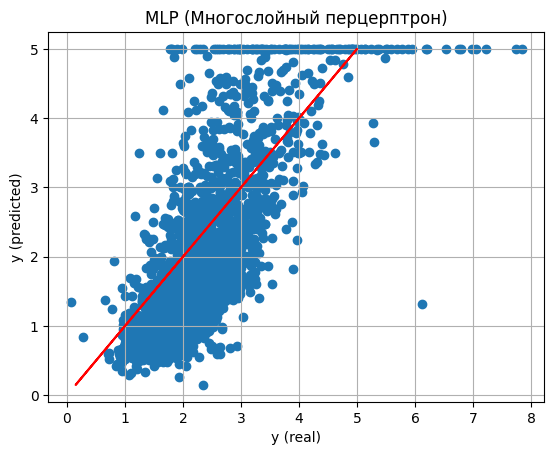

In [134]:
predict(MLPRegressor(), x_train.values, y_train.values, x_test.values, y_test.values, 'MLP (Многослойный перцерптрон)')

Score: 0.8092524122717131


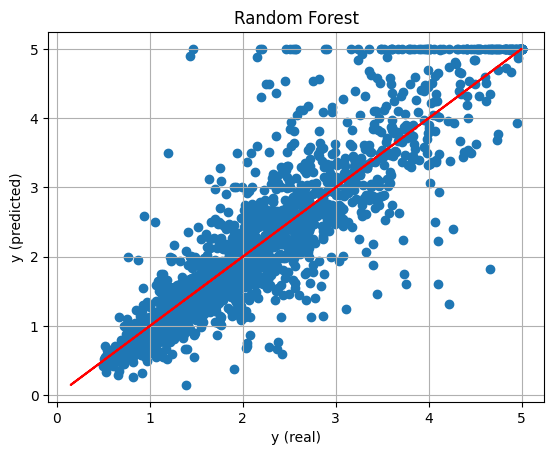

In [135]:
predict(RandomForestRegressor(), x_train.values, y_train.values, x_test.values, y_test.values, 'Random Forest')

Score: 0.5959044695435594


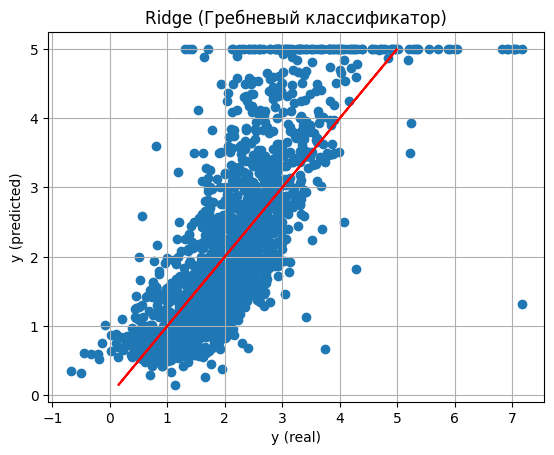

In [136]:
predict(Ridge(), x_train.values, y_train.values, x_test.values, y_test.values, 'Ridge (Гребневый классификатор)')

Score: 0.09911216844332149


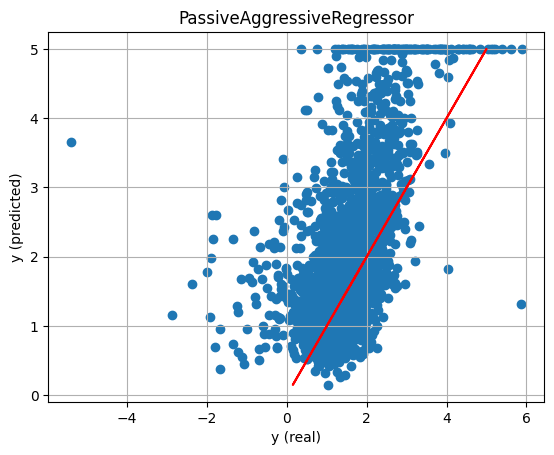

In [137]:
predict(PassiveAggressiveRegressor(), x_train.values, y_train.values, x_test.values, y_test.values, 'PassiveAggressiveRegressor')

In [138]:
table = PrettyTable()
table.field_names = ["Method", "Precision"]
for method in accuracies.keys():
    table.add_row([method, round(accuracies[method],5)])
print(table)

+---------------------------------+-----------+
|              Method             | Precision |
+---------------------------------+-----------+
|        Linear Regression        |  0.59588  |
| Polynomial Regression, degree 5 |  0.71616  |
|  MLP (Многослойный перцерптрон) |  0.47831  |
|          Random Forest          |  0.80925  |
| Ridge (Гребневый классификатор) |   0.5959  |
|    PassiveAggressiveRegressor   |  0.09911  |
+---------------------------------+-----------+
